In [37]:
# import required libraries
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [6]:
# Read the datasets
train_data = pd.read_csv("/content/train.csv")
test_data = pd.read_csv("/content/test.csv")

# Display the first few rows of each dataset
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data Preprocessing

In [8]:
# Check for missing values in train and test datasets
train_missing = train_data.isnull().sum()
test_missing = test_data.isnull().sum()

# Display missing values summary
print("train missing values\n", train_missing)
print()
print("test missing values\n", test_missing)

train missing values
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

test missing values
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [9]:
# Fill missing 'Age' values with the median grouped by 'Pclass' and 'Sex'
train_data['Age'] = train_data['Age'].fillna(
    train_data.groupby(['Pclass', 'Sex'])['Age'].transform('median'))

test_data['Age'] = test_data['Age'].fillna(
    test_data.groupby(['Pclass', 'Sex'])['Age'].transform('median'))

In [10]:
# Fill missing 'Embarked' values with the mode
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

In [11]:
# Fill missing 'Fare' value in test data with the median
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

In [12]:
# Drop 'Cabin' column due to the large number of missing values
train_data = train_data.drop(columns=['Cabin'])
test_data = test_data.drop(columns=['Cabin'])

In [13]:
print("train missing values\n", train_data.isnull().sum())
print()
print("test missing values\n", test_data.isnull().sum())

train missing values
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

test missing values
 PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [14]:
# Encode 'Sex' and 'Embarked' as numerical values
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

train_data['Embarked'] = train_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
test_data['Embarked'] = test_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [15]:
# Create a new feature 'FamilySize' (SibSp + Parch + 1)
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

In [16]:
# Extract titles from the 'Name' column
train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_data['Title'] = test_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Simplify titles into common categories
title_mapping = {
    'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Dr': 4, 'Rev': 4, 'Col': 4,
    'Major': 4, 'Mlle': 1, 'Countess': 2, 'Ms': 1, 'Lady': 2, 'Jonkheer': 4,
    'Don': 4, 'Mme': 2, 'Capt': 4, 'Sir': 4
}
train_data['Title'] = train_data['Title'].map(title_mapping).fillna(4)
test_data['Title'] = test_data['Title'].map(title_mapping).fillna(4)

In [17]:
# Drop columns that won't be used in the model
train_data = train_data.drop(columns=['PassengerId', 'Name', 'Ticket'])
test_data = test_data.drop(columns=['PassengerId', 'Name', 'Ticket'])

# Display the first few rows of the processed train dataset
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,0,22.0,1,0,7.2500,2,2,0
1,1,1,1,38.0,1,0,71.2833,0,2,2
2,1,3,1,26.0,0,0,7.9250,2,1,1
3,1,1,1,35.0,1,0,53.1000,2,2,2
4,0,3,0,35.0,0,0,8.0500,2,1,0


In [18]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,3,0,34.5,0,0,7.8292,1,1,0.0
1,3,1,47.0,1,0,7.0000,2,2,2.0
2,2,0,62.0,0,0,9.6875,1,1,0.0
3,3,0,27.0,0,0,8.6625,2,1,0.0
4,3,1,22.0,1,1,12.2875,2,3,2.0


# Exploratory Data Analysis (EDA)

In [19]:
# Basic Data Overview
print("Dataset Info:")
print(train_data.info())
print("\nMissing Values:\n", train_data.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked    891 non-null    int64  
 8   FamilySize  891 non-null    int64  
 9   Title       891 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 69.7 KB
None

Missing Values:
 Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
Title         0
dtype: int64


<ipython-input-20-c77c86fe0b18>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x='Survived', palette='Set2')


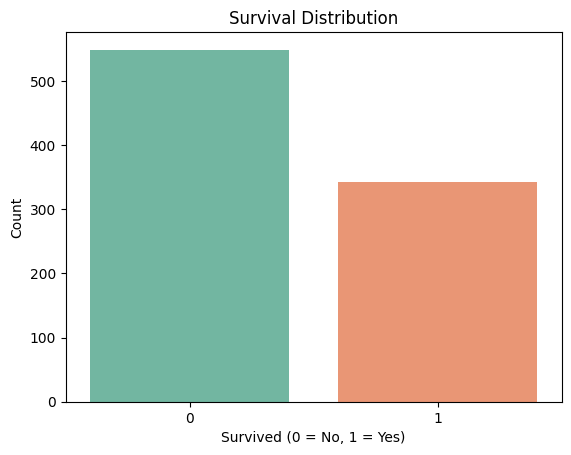

In [20]:
# Distribution of the Target Variable
sns.countplot(data=train_data, x='Survived', palette='Set2')
plt.title('Survival Distribution')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

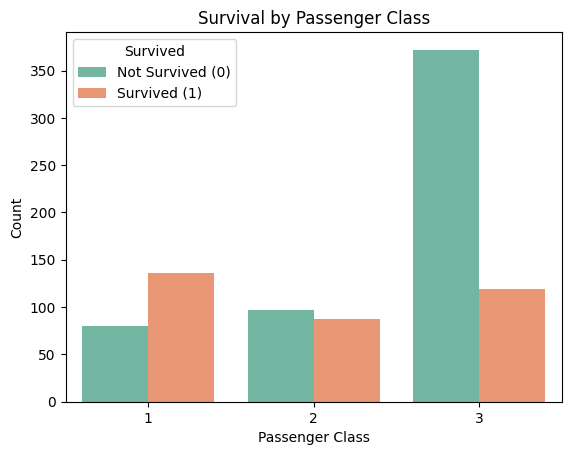

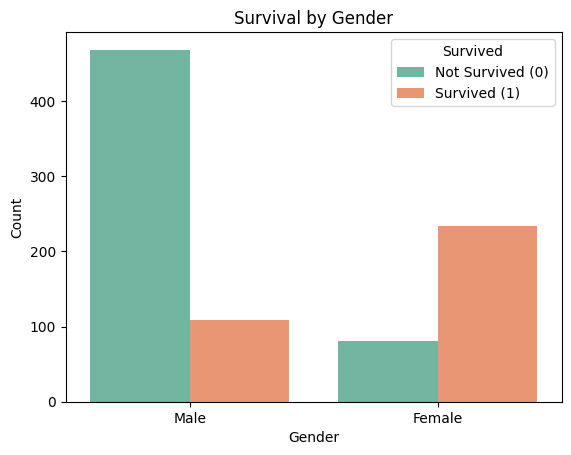

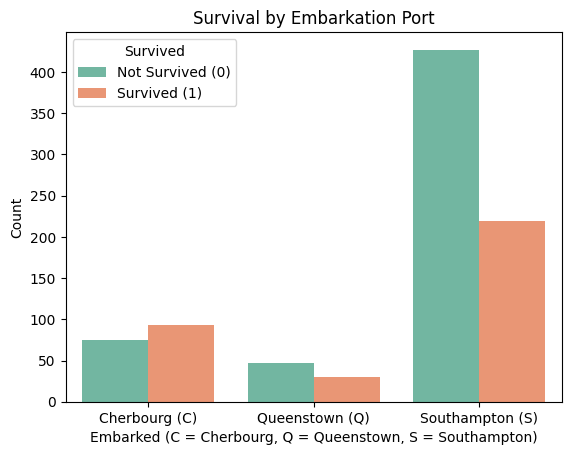

In [21]:
# Analyze Categorical Features

# Survival by Pclass
sns.countplot(data=train_data, x='Pclass', hue='Survived', palette='Set2')
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Not Survived (0)', 'Survived (1)'])
plt.show()

# Survival by Sex
sns.countplot(data=train_data, x='Sex', hue='Survived', palette='Set2')
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.legend(title='Survived', labels=['Not Survived (0)', 'Survived (1)'])
plt.show()

# Survival by Embarked
sns.countplot(data=train_data, x='Embarked', hue='Survived', palette='Set2')
plt.title('Survival by Embarkation Port')
plt.xlabel('Embarked (C = Cherbourg, Q = Queenstown, S = Southampton)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Cherbourg (C)', 'Queenstown (Q)', 'Southampton (S)'])
plt.legend(title='Survived', labels=['Not Survived (0)', 'Survived (1)'])
plt.show()

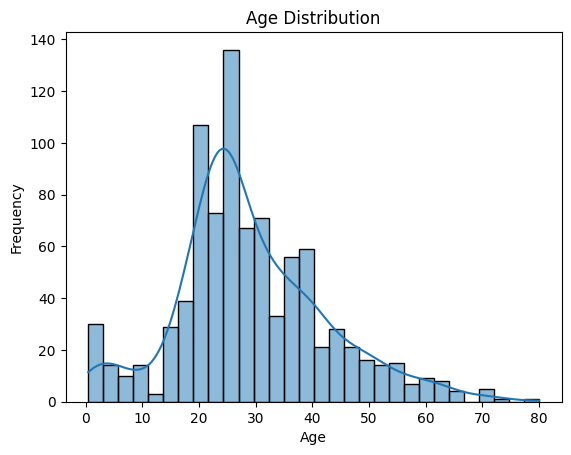

In [22]:
# Distribution of Age
sns.histplot(train_data['Age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

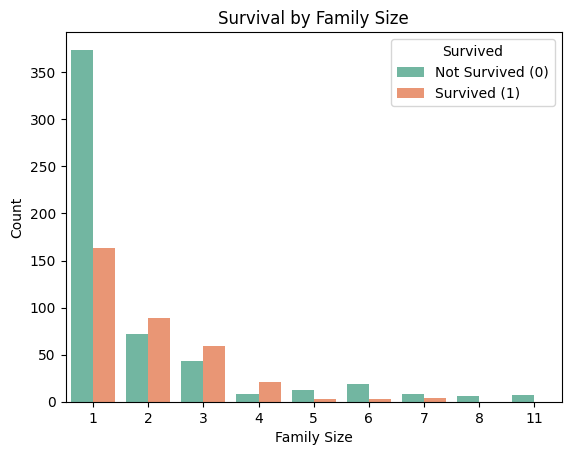

In [23]:
# Family Size
sns.countplot(data=train_data, x='FamilySize', hue='Survived', palette='Set2')
plt.title('Survival by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Not Survived (0)', 'Survived (1)'])
plt.show()

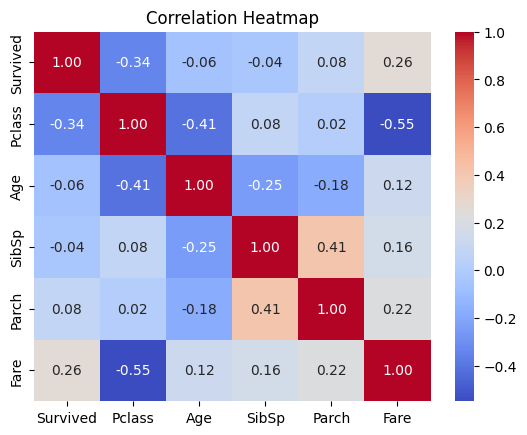

In [24]:
# Correlation Heatmap
corr_matrix = train_data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Decision Tree

In [42]:
train_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'FamilySize', 'Title'],
      dtype='object')

In [27]:
# Separate features and target
X = train_data.drop(columns=['Survived'])
y = train_data['Survived']

# Split the train dataset into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions and evaluate accuracy
y_pred = clf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Decision Tree Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:\n", classification_report(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))

Decision Tree Accuracy: 75.98%
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.79       105
           1       0.71      0.72      0.71        74

    accuracy                           0.76       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179


Confusion Matrix:
 [[83 22]
 [21 53]]


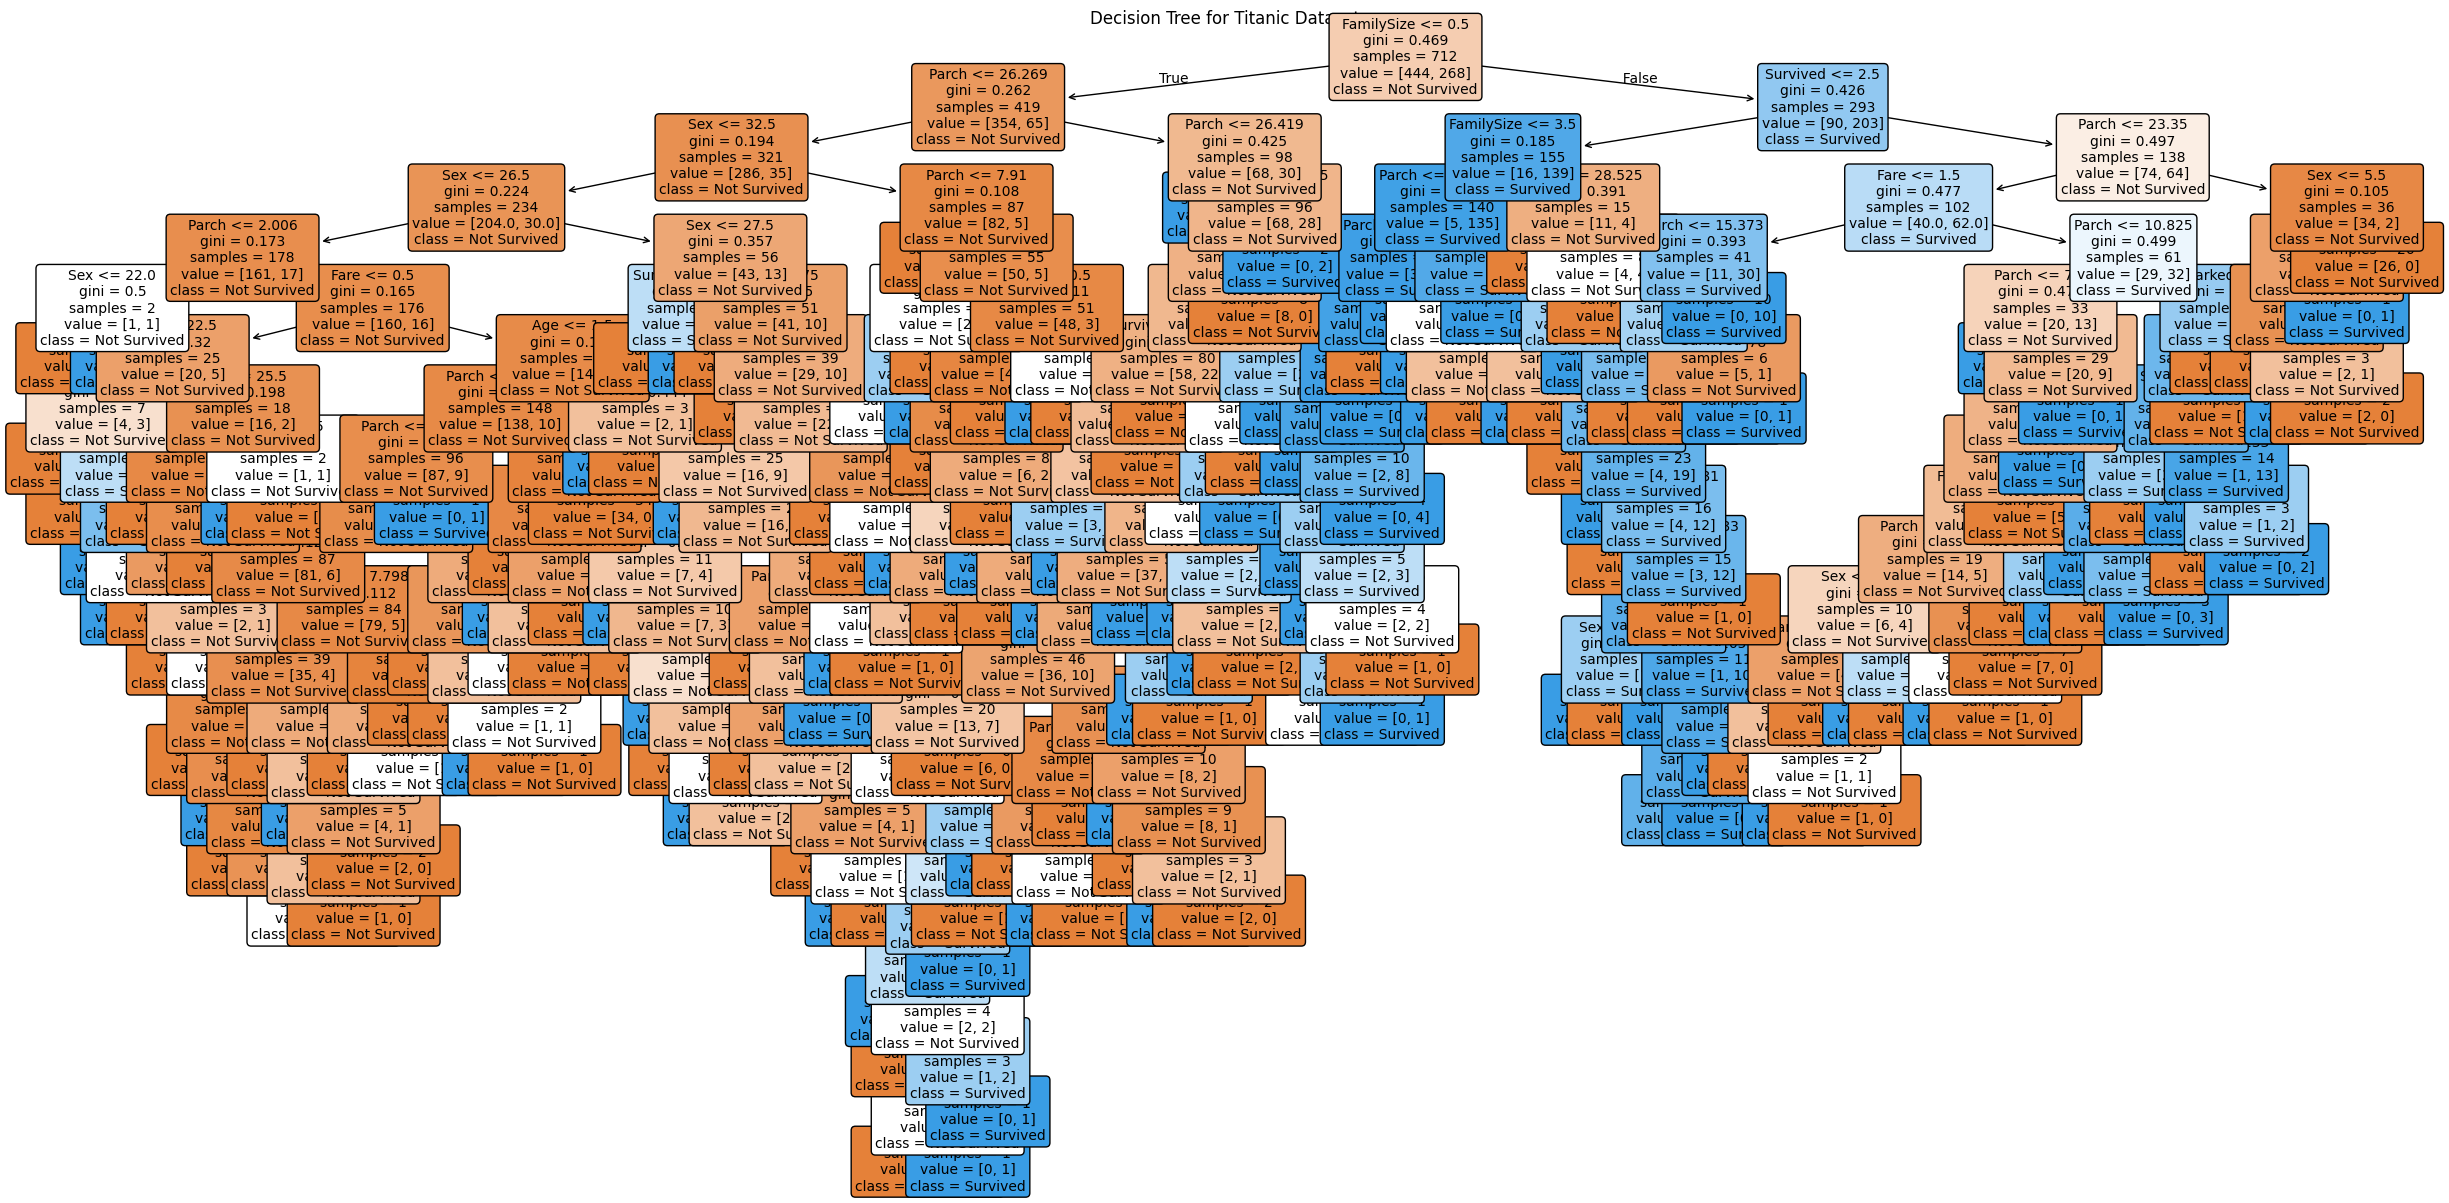

In [45]:
features = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'FamilySize', 'Title']
# Set up the plot dimensions
plt.figure(figsize=(30, 15))

# Plot the decision tree
plot_tree(clf,
          feature_names=features,
          class_names=['Not Survived', 'Survived'],
          filled=True,
          rounded=True,
          fontsize=10)

plt.title("Decision Tree for Titanic Dataset")
plt.show()